In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Данные 1

Первый набор данных - информация о грибах. Объясняемая переменная - съедобонсть.

In [ ]:
df = pd.read_csv('mushroom_cleaned.csv')

In [ ]:
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [ ]:
features = ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color', 'stem-height', 'stem-width', 'stem-color', 'season']
x = df.loc[:,features]

y = df.loc[:,'class']

x = StandardScaler().fit_transform(x)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pct = pca.fit_transform(x)

principal_df = pd.DataFrame(pct,columns=['pc1','pc2'])

finaldf= pd.concat([principal_df,df[['class']]],axis=1)

In [ ]:
finaldf

,pc1,pc2,class
0,2.620909,1.846414,1
1,2.780842,1.903234,1
2,2.603395,1.704416,1
3,2.946488,1.523961,1
4,2.649082,1.773289,1
...,...,...,...
54030,-1.161000,-0.033951,1
54031,-1.533194,0.359553,1
54032,-1.147389,0.016506,1
54033,-1.580212,0.263372,1


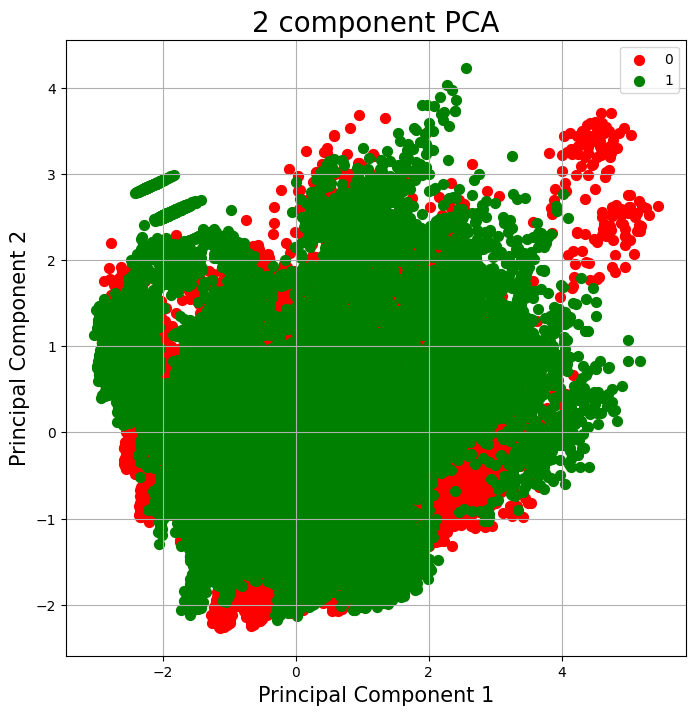

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['class'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'pc1']
               , finaldf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
# Если больше компонент

pca = PCA(n_components=4)

pct = pca.fit_transform(x)

principal_df = pd.DataFrame(pct,columns=['pc1','pc2','pc3','pc4'])

finaldf= pd.concat([principal_df,df[['class']]],axis=1)

pca.explained_variance_ratio_

array([0.26968342, 0.13757023, 0.13532946, 0.12715759])

# Данные 2

Второй набор данных - информация об участниках быстрых свиданий. Объясняемая переменная - успех свидания, объясняющие - оценки других участников по различным признакам (красота, честность, и пр.)

In [ ]:
df = pd.read_csv('speed_data_data.csv')
df = df.loc[:,['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'dec']]
df = df.dropna()
df

,attr,sinc,intel,fun,amb,shar,dec
0,6.0,9.0,7.0,7.0,6.0,5.0,1
1,7.0,8.0,7.0,8.0,5.0,6.0,1
2,5.0,8.0,9.0,8.0,5.0,7.0,1
3,7.0,6.0,8.0,7.0,6.0,8.0,1
4,5.0,6.0,7.0,7.0,6.0,6.0,1
...,...,...,...,...,...,...,...
8367,2.0,7.0,6.0,6.0,6.0,7.0,0
8368,3.0,4.0,6.0,4.0,4.0,4.0,0
8369,3.0,3.0,9.0,6.0,9.0,6.0,0
8370,2.0,7.0,9.0,8.0,7.0,8.0,0


In [ ]:


features = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']
x = df.loc[:,features]

y = df.loc[:,'dec']

x = StandardScaler().fit_transform(x)

In [ ]:
pca = PCA(n_components=2)

pct = pca.fit_transform(x)

principal_df = pd.DataFrame(pct,columns=['pc1','pc2'])

finaldf= pd.concat([principal_df,df[['dec']]],axis=1)

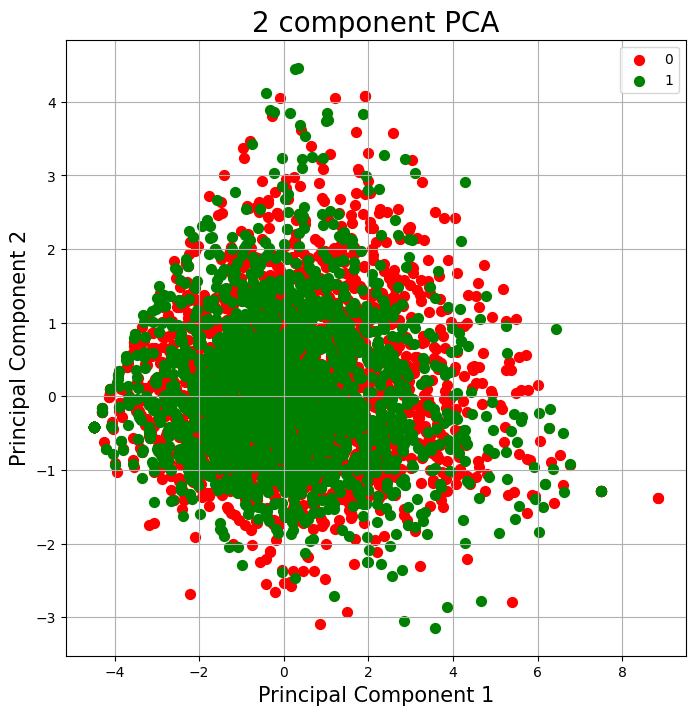

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['dec'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'pc1']
               , finaldf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
pca.explained_variance_ratio_

array([0.57609844, 0.14485411])

In [ ]:
# Если больше компонент

pca = PCA(n_components=4)

pct = pca.fit_transform(x)

principal_df = pd.DataFrame(pct,columns=['pc1','pc2','pc3','pc4'])

finaldf= pd.concat([principal_df,df[['dec']]],axis=1)

pca.explained_variance_ratio_

array([0.57609844, 0.14485411, 0.09479301, 0.08014401])

# Данные 3

Классический набор данных об Ирисах. Объясняемая переменная - сорт.

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [ ]:
feature = ['sepal length', 'sepal width', 'petal length', 'petal width']

x = df.loc[:,feature]

y = df.loc[:,'target']

x = StandardScaler().fit_transform(x)

In [ ]:
pca = PCA(n_components=2)

pct = pca.fit_transform(x)

principal_df = pd.DataFrame(pct,columns=['pc1','pc2'])

finaldf= pd.concat([principal_df,df[['target']]],axis=1)

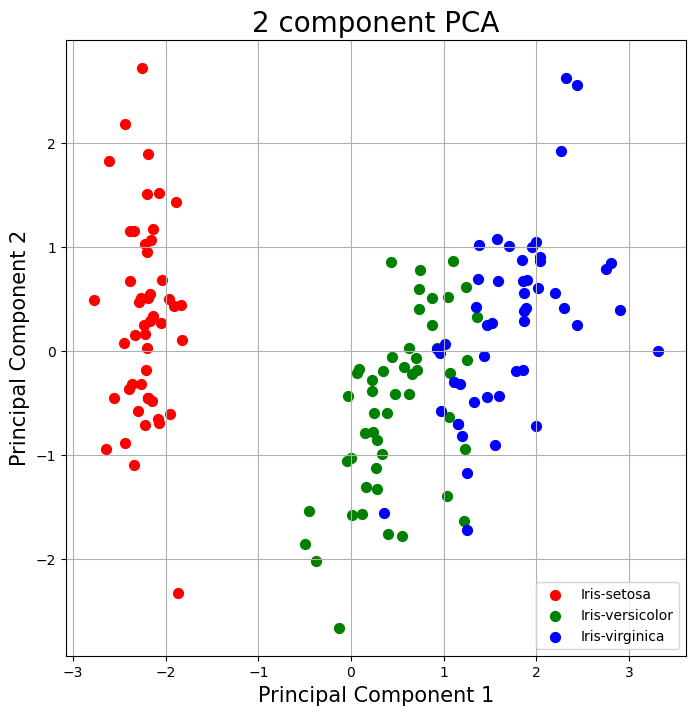

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['target'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'pc1']
               , finaldf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])